# Aggregate probability of antibiotic prescribing stratified by predicted risk level

In [1]:
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import PercentFormatter
from datetime import date
from operator import attrgetter
from contextlib import redirect_stdout
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

## 0- read data

In [2]:
#transfer data from other notebooks and prep
data_lrti_incdt = pd.read_csv(f'../output/hospitalisation_prediction_lrti/prob_pred_groupby_bin_lrti_incdt.csv')
data_lrti_prevl = pd.read_csv(f'../output/hospitalisation_prediction_lrti/prob_pred_groupby_bin_lrti_prevl.csv')
data_urti_combined_incdt = pd.read_csv(f'../output/hospitalisation_prediction_urti_combined/prob_pred_groupby_bin_urti_combined_incdt.csv')
data_urti_combined_prevl = pd.read_csv(f'../output/hospitalisation_prediction_urti_combined/prob_pred_groupby_bin_urti_combined_prevl.csv')
data_uti_incdt = pd.read_csv(f'../output/hospitalisation_prediction_uti/prob_pred_groupby_bin_uti_incdt.csv')
data_uti_prevl = pd.read_csv(f'../output/hospitalisation_prediction_uti/prob_pred_groupby_bin_uti_prevl.csv')
data_sinusitis_incdt = pd.read_csv(f'../output/hospitalisation_prediction_sinusitis/prob_pred_groupby_bin_sinusitis_incdt.csv')
data_sinusitis_prevl = pd.read_csv(f'../output/hospitalisation_prediction_sinusitis/prob_pred_groupby_bin_sinusitis_prevl.csv')
data_otmedia_incdt = pd.read_csv(f'../output/hospitalisation_prediction_otmedia/prob_pred_groupby_bin_otmedia_incdt.csv')
data_otmedia_prevl = pd.read_csv(f'../output/hospitalisation_prediction_otmedia/prob_pred_groupby_bin_otmedia_prevl.csv')
data_ot_externa_incdt = pd.read_csv(f'../output/hospitalisation_prediction_ot_externa/prob_pred_groupby_bin_ot_externa_incdt.csv')
data_ot_externa_prevl = pd.read_csv(f'../output/hospitalisation_prediction_ot_externa/prob_pred_groupby_bin_ot_externa_prevl.csv')
data_urti_incdt = pd.read_csv(f'../output/hospitalisation_prediction_urti/prob_pred_groupby_bin_urti_incdt.csv')
data_urti_prevl = pd.read_csv(f'../output/hospitalisation_prediction_urti/prob_pred_groupby_bin_urti_prevl.csv')
data_cough_incdt = pd.read_csv(f'../output/hospitalisation_prediction_cough/prob_pred_groupby_bin_cough_incdt.csv')
data_cough_prevl = pd.read_csv(f'../output/hospitalisation_prediction_cough/prob_pred_groupby_bin_cough_prevl.csv')
data_cough_cold_incdt = pd.read_csv(f'../output/hospitalisation_prediction_cough_cold/prob_pred_groupby_bin_cough_cold_incdt.csv')
data_cough_cold_prevl = pd.read_csv(f'../output/hospitalisation_prediction_cough_cold/prob_pred_groupby_bin_cough_cold_prevl.csv')
data_throat_incdt = pd.read_csv(f'../output/hospitalisation_prediction_throat/prob_pred_groupby_bin_throat_incdt.csv')
data_throat_prevl = pd.read_csv(f'../output/hospitalisation_prediction_throat/prob_pred_groupby_bin_throat_prevl.csv')

data_lrti_incdt['infection'] = 'lrti_incdt'
data_lrti_prevl['infection'] = 'lrti_prevl'
data_urti_combined_incdt['infection'] = 'urti_combined_incdt'
data_urti_combined_prevl['infection'] = 'urti_combined_prevl'
data_uti_incdt['infection'] = 'uti_incdt'
data_uti_prevl['infection'] = 'uti_prevl'
data_sinusitis_incdt['infection'] = 'sinusitis_incdt'
data_sinusitis_prevl['infection'] = 'sinusitis_prevl'
data_otmedia_incdt['infection'] = 'otmedia_incdt'
data_otmedia_prevl['infection'] = 'otmedia_prevl'
data_ot_externa_incdt['infection'] = 'ot_externa_incdt'
data_ot_externa_prevl['infection'] = 'ot_externa_prevl'
data_urti_incdt['infection'] = 'urti_incdt'
data_urti_prevl['infection'] = 'urti_prevl'
data_cough_incdt['infection'] = 'cough_incdt'
data_cough_prevl['infection'] = 'cough_prevl'
data_cough_cold_incdt['infection'] = 'cough_cold_incdt'
data_cough_cold_prevl['infection'] = 'cough_cold_prevl'
data_throat_incdt['infection'] = 'throat_incdt'
data_throat_prevl['infection'] = 'throat_prevl'

data_lrti_incdt['decile'] = data_lrti_incdt.index + 1
data_lrti_prevl['decile'] = data_lrti_prevl.index + 1
data_urti_combined_incdt['decile'] = data_urti_combined_incdt.index + 1
data_urti_combined_prevl['decile'] = data_urti_combined_prevl.index + 1
data_uti_incdt['decile'] = data_uti_incdt.index + 1
data_uti_prevl['decile'] = data_uti_prevl.index + 1
data_sinusitis_incdt['decile'] = data_sinusitis_incdt.index + 1
data_sinusitis_prevl['decile'] = data_sinusitis_prevl.index + 1
data_otmedia_incdt['decile'] = data_otmedia_incdt.index + 1
data_otmedia_prevl['decile'] = data_otmedia_prevl.index + 1
data_ot_externa_incdt['decile'] = data_ot_externa_incdt.index + 1
data_ot_externa_prevl['decile'] = data_ot_externa_prevl.index + 1
data_urti_incdt['decile'] = data_urti_incdt.index + 1
data_urti_prevl['decile'] = data_urti_prevl.index + 1
data_cough_incdt['decile'] = data_cough_incdt.index + 1
data_cough_prevl['decile'] = data_cough_prevl.index + 1
data_cough_cold_incdt['decile'] = data_cough_cold_incdt.index + 1
data_cough_cold_prevl['decile'] = data_cough_cold_prevl.index + 1
data_throat_incdt['decile'] = data_throat_incdt.index + 1
data_throat_prevl['decile'] = data_throat_prevl.index + 1

## 1- save data and plot

In [3]:
#combine all data together
data = data_lrti_incdt.append([data_lrti_prevl, data_urti_combined_incdt, data_urti_combined_prevl, data_uti_incdt, data_uti_prevl, data_sinusitis_incdt, data_sinusitis_prevl, data_otmedia_incdt, data_otmedia_prevl, data_ot_externa_incdt, data_ot_externa_prevl, data_urti_incdt, data_urti_prevl, data_cough_incdt, data_cough_prevl, data_cough_cold_incdt, data_cough_cold_prevl, data_throat_incdt, data_throat_prevl], ignore_index=True)
data_sel_incdt = data_lrti_incdt.append([data_urti_combined_incdt, data_uti_incdt], ignore_index=True)
data_sel_prevl = data_lrti_prevl.append([data_urti_combined_prevl, data_uti_prevl], ignore_index=True)
#round and save data
data[['pred_mean_train', 'ab_prob_mean_train', 'pred_mean_test', 'ab_prob_mean_test']] = np.round(data[['pred_mean_train', 'ab_prob_mean_train', 'pred_mean_test', 'ab_prob_mean_test']], decimals=2)
data_sel_incdt[['pred_mean_train', 'ab_prob_mean_train', 'pred_mean_test', 'ab_prob_mean_test']] = np.round(data_sel_incdt[['pred_mean_train', 'ab_prob_mean_train', 'pred_mean_test', 'ab_prob_mean_test']], decimals=2)
data_sel_prevl[['pred_mean_train', 'ab_prob_mean_train', 'pred_mean_test', 'ab_prob_mean_test']] = np.round(data_sel_prevl[['pred_mean_train', 'ab_prob_mean_train', 'pred_mean_test', 'ab_prob_mean_test']], decimals=2)
data.to_csv('../output/aggregate_ab_prob/aggregate_ab_prob_plots.csv', index=False)
data

,pred_mean_train,ab_prob_mean_train,pred_mean_test,ab_prob_mean_test,infection,decile
0,0.00,0.17,0.00,0.17,lrti_incdt,1
1,0.00,0.13,0.00,0.13,lrti_incdt,2
2,0.01,0.12,0.01,0.12,lrti_incdt,3
3,0.01,0.11,0.01,0.11,lrti_incdt,4
4,0.01,0.10,0.01,0.10,lrti_incdt,5
...,...,...,...,...,...,...
195,0.00,0.06,0.00,0.05,throat_prevl,6
196,0.01,0.05,0.01,0.04,throat_prevl,7
197,0.01,0.02,0.01,0.02,throat_prevl,8
198,0.01,0.01,0.01,0.01,throat_prevl,9


In [4]:
data_sel_incdt

,pred_mean_train,ab_prob_mean_train,pred_mean_test,ab_prob_mean_test,infection,decile
0,0.00,0.17,0.00,0.17,lrti_incdt,1
1,0.00,0.13,0.00,0.13,lrti_incdt,2
2,0.01,0.12,0.01,0.12,lrti_incdt,3
3,0.01,0.11,0.01,0.11,lrti_incdt,4
4,0.01,0.10,0.01,0.10,lrti_incdt,5
5,0.01,0.09,0.01,0.10,lrti_incdt,6
6,0.01,0.08,0.01,0.08,lrti_incdt,7
7,0.01,0.08,0.01,0.07,lrti_incdt,8
8,0.01,0.07,0.01,0.07,lrti_incdt,9
9,0.01,0.05,0.01,0.06,lrti_incdt,10


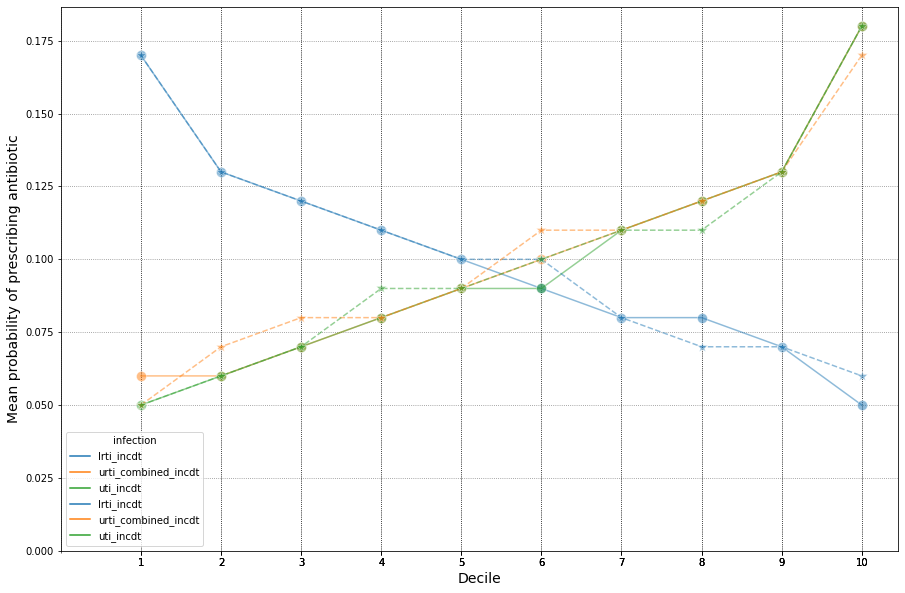

In [5]:
plt.figure(figsize=(15,10))
sns.lineplot(x='decile', y='ab_prob_mean_train', data=data_sel_incdt, hue='infection', marker='o', markersize=10)
g = sns.lineplot(x="decile", data=data_sel_incdt, y="ab_prob_mean_test",  hue="infection", marker='*', linestyle='--', markersize=10)

plt.ylim(0)#, data.pred_mean_train.max() + data.pred_mean_train.max()/3)
plt.xlim(0)#, data.ab_prob_mean_train.max() + data.ab_prob_mean_train.max()/3)
plt.setp(g.collections, alpha=.5) #alpha for markers
plt.setp(g.lines, alpha=.5) #alpha for line
plt.xlabel('Decile', fontsize=14)
plt.ylabel('Mean probability of prescribing antibiotic', fontsize=14)
plt.gca().set_xticks(np.arange(0,10,1), minor=True)
plt.grid(b=True, which='major', color='k', linestyle=':', alpha=0.5)
plt.grid(which='minor', color='k', linestyle=':', alpha=0.5)
plt.xticks(data_sel_incdt.decile)
# plt.legend([],[], frameon=False)
plt.savefig('../output/aggregate_ab_prob/aggregate_ab_prob_incdt.jpg')
plt.show()

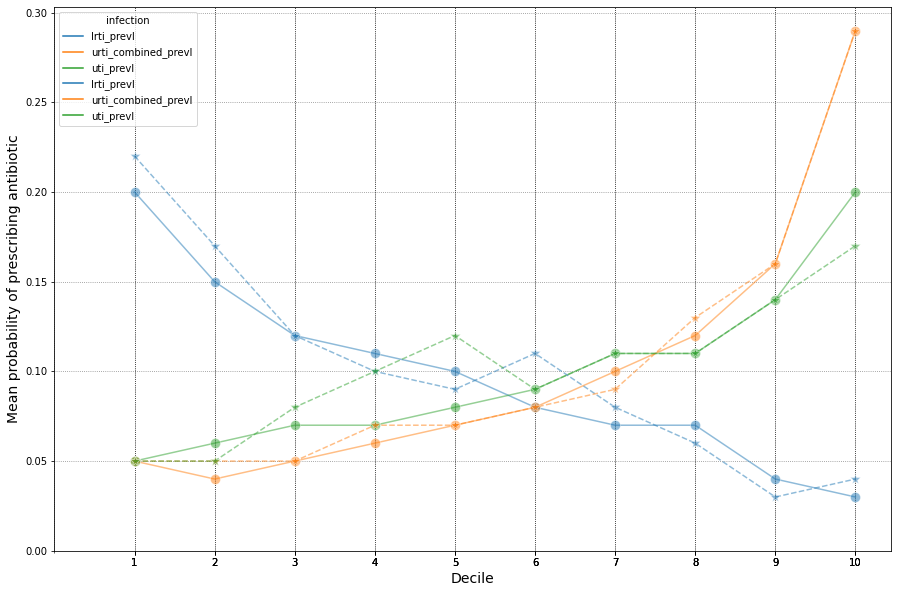

: 

In [6]:
plt.figure(figsize=(15,10))
sns.lineplot(x='decile', y='ab_prob_mean_train', data=data_sel_prevl, hue='infection', marker='o', markersize=10)
g = sns.lineplot(x="decile", data=data_sel_prevl, y="ab_prob_mean_test",  hue="infection", marker='*', linestyle='--', markersize=10)

plt.ylim(0)
plt.xlim(0)
plt.setp(g.collections, alpha=.5) #alpha for markers
plt.setp(g.lines, alpha=.5) #alpha for line
plt.xlabel('Decile', fontsize=14)
plt.ylabel('Mean probability of prescribing antibiotic', fontsize=14)
plt.gca().set_xticks(np.arange(0,10,1), minor=True)
plt.grid(b=True, which='major', color='k', linestyle=':', alpha=0.5)
plt.grid(which='minor', color='k', linestyle=':', alpha=0.5)
plt.xticks(data_sel_prevl.decile)
# plt.legend([],[], frameon=False)
plt.savefig('../output/aggregate_ab_prob/aggregate_ab_prob_prevl.jpg')
plt.show()